# Toy example

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import RKHS_DAGMA

/opt/anaconda3/envs/admg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(0)
torch.set_default_dtype(torch.float64)
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_device(device)

## quadratic

In [3]:
np.random.seed(0)
x = np.random.uniform(low=0, high=10, size=100)
epsilon = np.random.normal(0,1, 100) 
y = np.array([x**2 + epsilon for x, epsilon in zip(x, epsilon)])
X = np.column_stack((x, y))
X = torch.from_numpy(X).to(device)

eq_model = RKHS_DAGMA.RKHSDagma(X, gamma = 1).to(device)
model = RKHS_DAGMA.RKHSDagma_nonlinear(eq_model)
W_est_no_thresh, output = model.fit(X, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 1.0, lr=0.03, w_threshold=0.0)

  0%|          | 0/33000.0 [00:00<?, ?it/s]

In [4]:
W_est_no_thresh

array([[0.00000000e+00, 1.03547316e+01],
       [6.22198536e-04, 0.00000000e+00]])

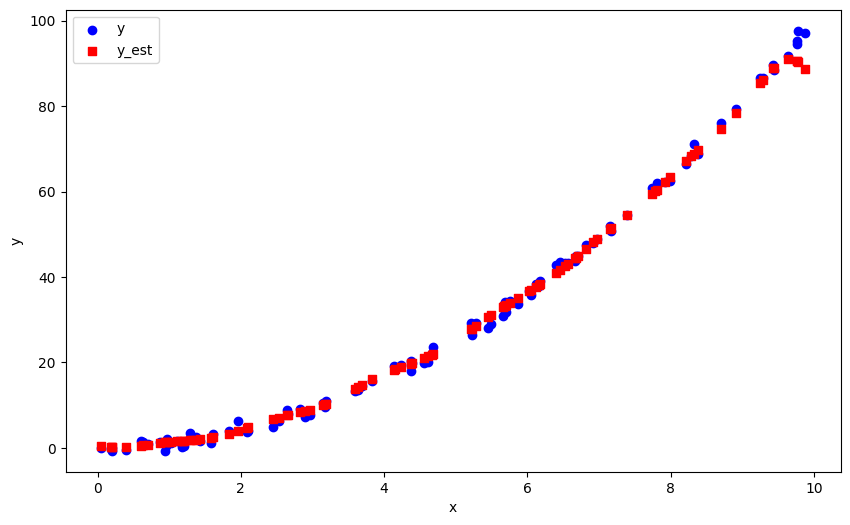

In [5]:
y_hat = output[:, 1].cpu().detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## inverse

In [6]:
np.random.seed(8)
x = np.random.uniform(low=0.001, high=1, size=100)
epsilon = np.random.normal(0, 1, 100) 
y = np.array([1/x + epsilon for x, epsilon in zip(x, epsilon)])
X = np.column_stack((x, y))
X = torch.from_numpy(X).to(device)

eq_model = RKHS_DAGMA.RKHSDagma(X, gamma = 1).to(device)
model = RKHS_DAGMA.RKHSDagma_nonlinear(eq_model)
W_est_no_thresh, output = model.fit(X, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 1.0, lr=0.03, w_threshold=0.0)
W_est_no_thresh

  0%|          | 0/33000.0 [00:00<?, ?it/s]

array([[0.00000000e+00, 3.71703056e+01],
       [3.09254674e-04, 0.00000000e+00]])

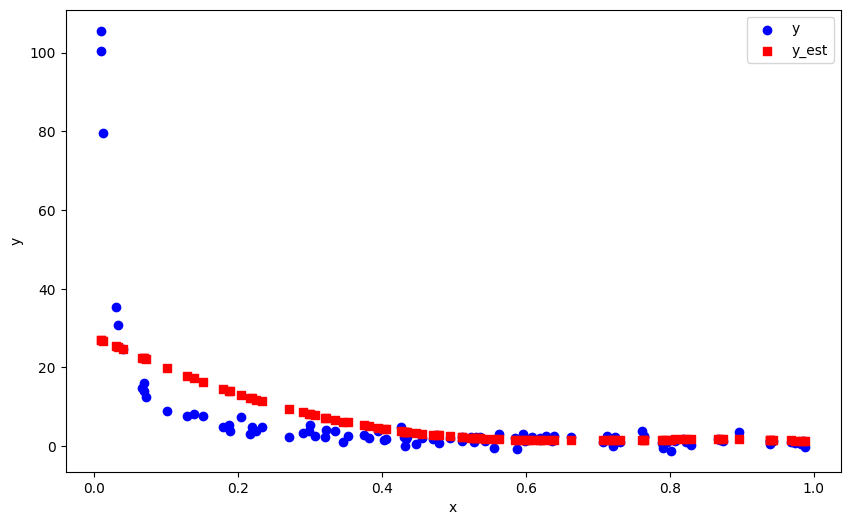

In [7]:
y_hat = output[:, 1].cpu().detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## qubic

In [8]:
np.random.seed(0)
x = np.random.uniform(low=-10, high=10, size=100)
epsilon = np.random.normal(0, 1, 100) 
y = np.array([x**3 + x + epsilon for x, epsilon in zip(x, epsilon)])
X = np.column_stack((x, y))
X = torch.from_numpy(X).to(device)

eq_model = RKHS_DAGMA.RKHSDagma(X, gamma = 1).to(device)
model = RKHS_DAGMA.RKHSDagma_nonlinear(eq_model)
W_est_no_thresh, output = model.fit(X, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 1.0, lr=0.03, w_threshold=0.0)
W_est_no_thresh

  0%|          | 0/33000.0 [00:00<?, ?it/s]

array([[0.00000000e+00, 2.44655005e+02],
       [3.27548277e-05, 0.00000000e+00]])

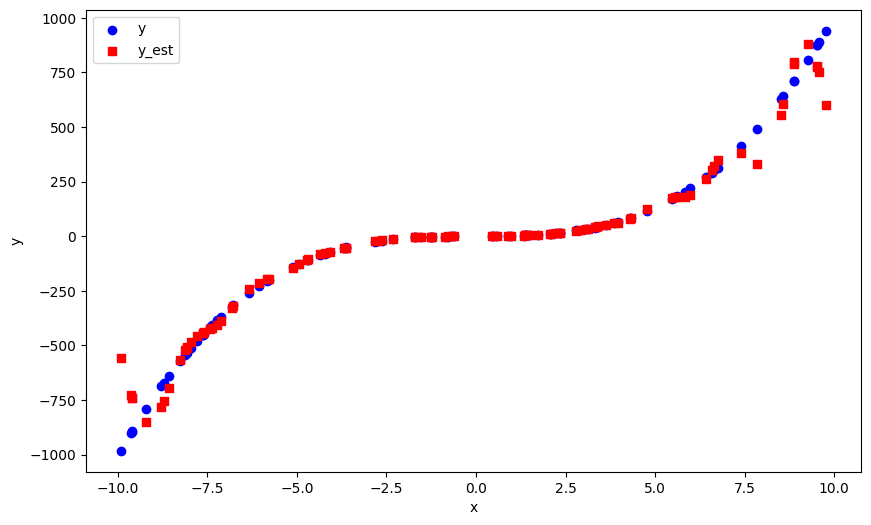

In [9]:
y_hat = output[:, 1].cpu().detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## sin

In [3]:
np.random.seed(0)
x = np.random.normal(loc=0.0, scale=1.0, size=100)
epsilon = np.random.normal(0, 1, 100) 
y = np.array([np.sin(x)*10 + epsilon for x, epsilon in zip(x, epsilon)])
X = np.column_stack((x, y))
X = torch.from_numpy(X).to(device)

eq_model = RKHS_DAGMA.RKHSDagma(X, gamma = 1).to(device)
model = RKHS_DAGMA.RKHSDagma_nonlinear(eq_model)
W_est_no_thresh, output = model.fit(X, lambda1=1e-3, tau=1e-4, T = 6, mu_init = 1.0, lr=0.03, w_threshold=0.0)
W_est_no_thresh

33009it [00:29, 1135.23it/s]                             


array([[0.00000000e+00, 4.86838036e+00],
       [1.12633390e-03, 0.00000000e+00]])

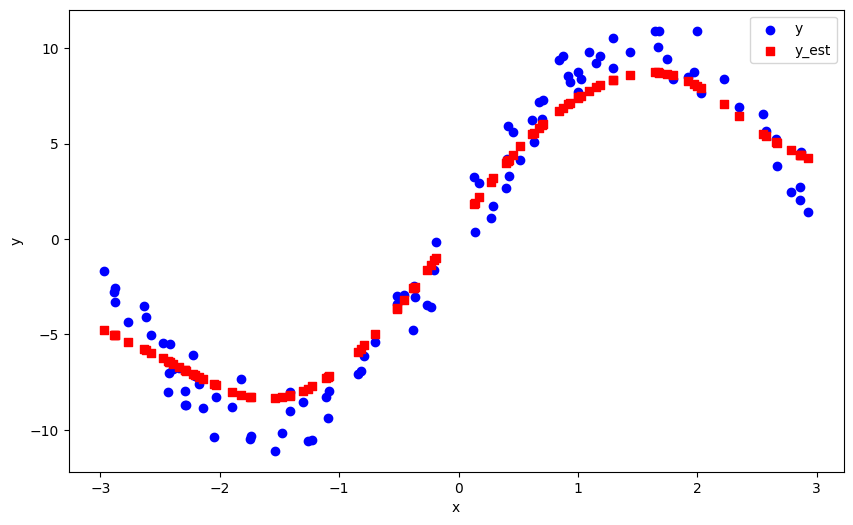

In [4]:
y_hat = output[:, 1].cpu().detach().numpy()
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(x, y, label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(x, y_hat, label='y_est', color='red', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
epsilon = X - output
empirical_covariance = np.cov(epsilon.detach().numpy(), rowvar=False)
print(f"Covariance: {empirical_covariance}")

Covariance: [[2.76838863 0.24163574]
 [0.24163574 2.27060382]]
